In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn. linear_model import Lasso

from sklearn.metrics import mean_squared_error as MSE

In [12]:
sns.set_theme(style = 'darkgrid')

In [13]:
Dados = pd.read_csv('Dados\\Corpo.csv')

X = Dados.drop(['BodyFat', 'Density'], axis = 'columns')

Y = Dados[['BodyFat']]

In [14]:
X_Treino, X_Teste, Y_Treino , Y_Teste = train_test_split(
    
    X, Y,

    test_size = 0.2,

    random_state = 0

)

In [15]:
KF = KFold(n_splits = 5, shuffle = True , random_state = 0)

In [16]:
LASSO = Pipeline(

    [

        ('Escalonamento', StandardScaler(with_mean =  False)), 
        
        ('LASSO', Lasso())

    ]

)

Parametros = {'LASSO__alpha': 10**np.linspace(5, -2, 100)}

ALPHA = GridSearchCV(LASSO, Parametros, cv = KF, scoring = 'neg_mean_squared_error')

ALPHA.fit(X_Treino, Y_Treino);

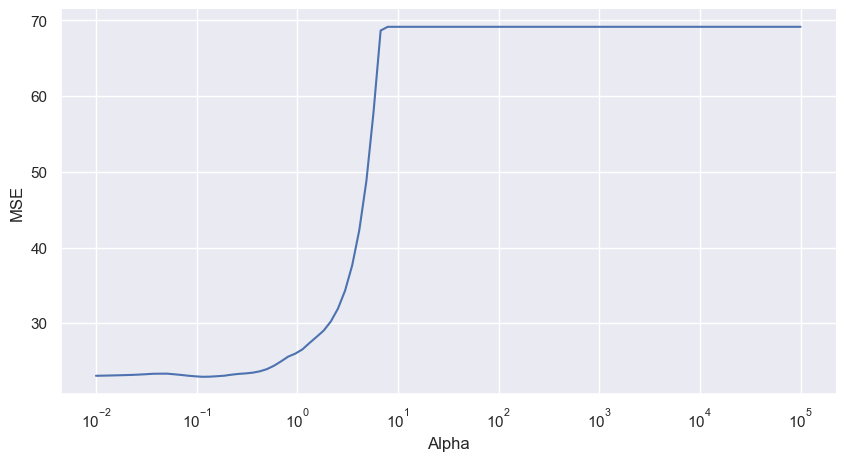

In [17]:
Grade = pd.DataFrame(ALPHA.cv_results_)

Grade = Grade[['param_LASSO__alpha', 'mean_test_score']]

Grade = Grade.rename(

    columns = {

        'param_LASSO__alpha': 'Alpha', 
        
        'mean_test_score': 'MSE'

    }

)

Grade['MSE'] = -Grade['MSE']

plt.figure(figsize = (10, 5))

Grafico = sns.lineplot(

    data = Grade, 
    
    x = 'Alpha', y = 'MSE'
    
)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xscale('log')

plt.show()

In [18]:
ALPHA_ast = ALPHA.best_params_['LASSO__alpha']

print(f'Melhor alpha: {np.round(ALPHA_ast, 4)}')

Melhor alpha: 0.115


In [19]:
LASSO_ast = Lasso(alpha = ALPHA_ast)

LASSO_ast.fit(X_Treino, Y_Treino);

In [20]:
Teste = [MSE(Y_Teste, LASSO_ast.predict(X_Teste))]

Estimador = ['Lasso']